# Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy


# Mute the sklearn and IPython warnings
import warnings
warnings.filterwarnings('ignore', module='sklearn')
pd.options.display.float_format = '{:.2f}'.format

path = 'data/Human_Activity_Recognition_Using_Smartphones_Data.csv'
"""
Data recodrded from phone sensors to predict whether the user is doing one of the 6 activities
"""

'\nData recodrded from phone sensors to predict whether the user is doing one of the 6 activities\n'

In [2]:
df = pd.DataFrame(pd.read_csv(path))
feature_columns = [x for x in df.columns if x not in 'Activity']
df.head()                  

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.29,-0.02,-0.13,-1.00,-0.98,-0.91,-1.00,-0.98,-0.92,-0.93,...,-0.30,-0.71,-0.11,0.03,-0.46,-0.02,-0.84,0.18,-0.06,STANDING
1,0.28,-0.02,-0.12,-1.00,-0.98,-0.96,-1.00,-0.97,-0.96,-0.94,...,-0.60,-0.86,0.05,-0.01,-0.73,0.70,-0.84,0.18,-0.05,STANDING
2,0.28,-0.02,-0.11,-1.00,-0.97,-0.98,-1.00,-0.96,-0.98,-0.94,...,-0.39,-0.76,-0.12,0.18,0.10,0.81,-0.85,0.18,-0.05,STANDING
3,0.28,-0.03,-0.12,-1.00,-0.98,-0.99,-1.00,-0.98,-0.99,-0.94,...,-0.12,-0.48,-0.04,-0.01,0.64,-0.49,-0.85,0.18,-0.05,STANDING
4,0.28,-0.02,-0.12,-1.00,-0.98,-0.99,-1.00,-0.98,-0.99,-0.94,...,-0.35,-0.70,0.12,0.12,0.69,-0.62,-0.85,0.19,-0.04,STANDING


In [3]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [4]:
df.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

In [5]:
df.shape

(10299, 562)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [7]:
df.nunique()

tBodyAcc-mean()-X                       10292
tBodyAcc-mean()-Y                       10299
tBodyAcc-mean()-Z                       10293
tBodyAcc-std()-X                        10295
tBodyAcc-std()-Y                        10297
tBodyAcc-std()-Z                        10297
tBodyAcc-mad()-X                        10291
tBodyAcc-mad()-Y                        10298
tBodyAcc-mad()-Z                        10297
tBodyAcc-max()-X                         7301
tBodyAcc-max()-Y                         7311
tBodyAcc-max()-Z                         7292
tBodyAcc-min()-X                         7323
tBodyAcc-min()-Y                         7359
tBodyAcc-min()-Z                         7246
tBodyAcc-sma()                          10297
tBodyAcc-energy()-X                      9744
tBodyAcc-energy()-Y                     10105
tBodyAcc-energy()-Z                     10233
tBodyAcc-iqr()-X                        10289
tBodyAcc-iqr()-Y                        10295
tBodyAcc-iqr()-Z                  

In [8]:
df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [9]:
df.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
tBodyAcc-std()-Z                        float64
tBodyAcc-mad()-X                        float64
tBodyAcc-mad()-Y                        float64
tBodyAcc-mad()-Z                        float64
tBodyAcc-max()-X                        float64
tBodyAcc-max()-Y                        float64
tBodyAcc-max()-Z                        float64
tBodyAcc-min()-X                        float64
tBodyAcc-min()-Y                        float64
tBodyAcc-min()-Z                        float64
tBodyAcc-sma()                          float64
tBodyAcc-energy()-X                     float64
tBodyAcc-energy()-Y                     float64
tBodyAcc-energy()-Z                     float64
tBodyAcc-iqr()-X                        float64
tBodyAcc-iqr()-Y                        

In [10]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,...,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00,10299.00
mean,0.27,-0.02,-0.11,-0.61,-0.51,-0.61,-0.63,-0.53,-0.61,-0.47,...,0.13,-0.30,-0.62,0.01,0.00,0.02,-0.01,-0.50,0.06,-0.05
std,0.07,0.04,0.05,0.44,0.50,0.40,0.41,0.48,0.40,0.54,...,0.25,0.32,0.31,0.34,0.45,0.62,0.48,0.51,0.31,0.27
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,0.26,-0.02,-0.12,-0.99,-0.98,-0.98,-0.99,-0.98,-0.98,-0.94,...,-0.02,-0.54,-0.84,-0.12,-0.29,-0.49,-0.39,-0.82,0.00,-0.13
50%,0.28,-0.02,-0.11,-0.94,-0.84,-0.85,-0.95,-0.84,-0.85,-0.87,...,0.14,-0.34,-0.70,0.01,0.01,0.02,-0.01,-0.72,0.18,-0.00
75%,0.29,-0.01,-0.10,-0.25,-0.06,-0.28,-0.30,-0.09,-0.29,-0.01,...,0.29,-0.11,-0.49,0.15,0.29,0.54,0.37,-0.52,0.25,0.10
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Data is already clean. No preprocessing required.

## K-Means

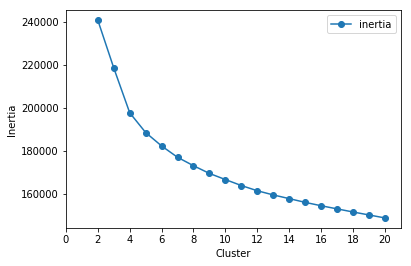

In [11]:
# K-Means with no. of clusters ranging from 2 to 20 in steps of 2 
# calculating inertia to find optimum number of clusters

km_list = list()

for clust in range(2,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(df[feature_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))
    
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

Since we already know how many clusters we would need, we'll go with 6

In [12]:
km = KMeans(n_clusters=6, random_state=42)
km = km.fit(df[feature_columns])
df['kmeans'] = km.predict(df[feature_columns])

In [13]:
(df[['Activity','kmeans']]
 .groupby(['Activity','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           kmeans        
LAYING             2          171
                   3           12
                   4         1761
SITTING            1         1253
                   2          472
                   3            3
                   4           49
STANDING           1         1232
                   2          674
WALKING            0          868
                   3          704
                   5          150
WALKING_DOWNSTAIRS 0          764
                   3          187
                   5          455
WALKING_UPSTAIRS   0          297
                   3         1166
                   5           81

## Hierarchical Agglomerative Clustering

In [14]:
# HAC with 6 clusters with ward and average linkage

for linkage in ['average', 'ward']:
    ag = AgglomerativeClustering(n_clusters=6, linkage=linkage, compute_full_tree=True)
    ag = ag.fit(df[feature_columns])
    df[str('HAC_'+linkage)] = ag.fit_predict(df[feature_columns])

In [15]:
(df[['Activity','HAC_average']]
 .groupby(['Activity','HAC_average'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           HAC_average        
LAYING             0              1944
SITTING            0              1777
STANDING           0              1906
WALKING            1                 1
                   3              1714
                   4                 7
WALKING_DOWNSTAIRS 1                24
                   2                 4
                   3              1375
                   4                 1
                   5                 2
WALKING_UPSTAIRS   3              1544

In [16]:
(df[['Activity','HAC_ward']]
 .groupby(['Activity','HAC_ward'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           HAC_ward        
LAYING             0            161
                   2           1783
SITTING            0            921
                   2             11
                   5            845
STANDING           0           1416
                   5            490
WALKING            1           1300
                   3            371
                   4             51
WALKING_DOWNSTAIRS 1           1000
                   3            127
                   4            279
WALKING_UPSTAIRS   1            373
                   3           1171

### None of the methods give satisfactory results 
- Dimensionality reduction is needed
- Algorithms can't differentiate between walking/walking downstairs, and sitting/laying

## PCA - Dimensionality Reduction

In [17]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(2, 250,25):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df[feature_columns])
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
2,PCA(n_components=2),0.67
27,PCA(n_components=27),0.88
52,PCA(n_components=52),0.93
77,PCA(n_components=77),0.96
102,PCA(n_components=102),0.97
127,PCA(n_components=127),0.98
152,PCA(n_components=152),0.99
177,PCA(n_components=177),0.99
202,PCA(n_components=202),1.00


In [18]:
pca = PCA(n_components=2)
df_pca = pca.fit(df[feature_columns])
df_pca = pd.DataFrame(pca.transform(df[feature_columns]), columns=['PCA%i' % i for i in range(2)], index=df[feature_columns].index)
df_pca.head()

,PCA0,PCA1
0,-5.54,-0.72
1,-5.56,-0.58
2,-5.50,-0.30
3,-5.70,0.35
4,-5.77,0.56


## K-means with PCA

In [19]:
km = KMeans(n_clusters=6, random_state=42)
km = km.fit(df_pca)
df['pca'] = km.predict(df_pca)
(df[['Activity','pca']]
 .groupby(['Activity','pca'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           pca        
LAYING             0        12
                   1       545
                   3      1218
                   5       169
SITTING            0         3
                   1       904
                   3       533
                   5       337
STANDING           1      1111
                   3       220
                   5       575
WALKING            0       663
                   2       867
                   4       192
WALKING_DOWNSTAIRS 0       184
                   2       701
                   4       521
WALKING_UPSTAIRS   0      1067
                   2       439
                   4        38

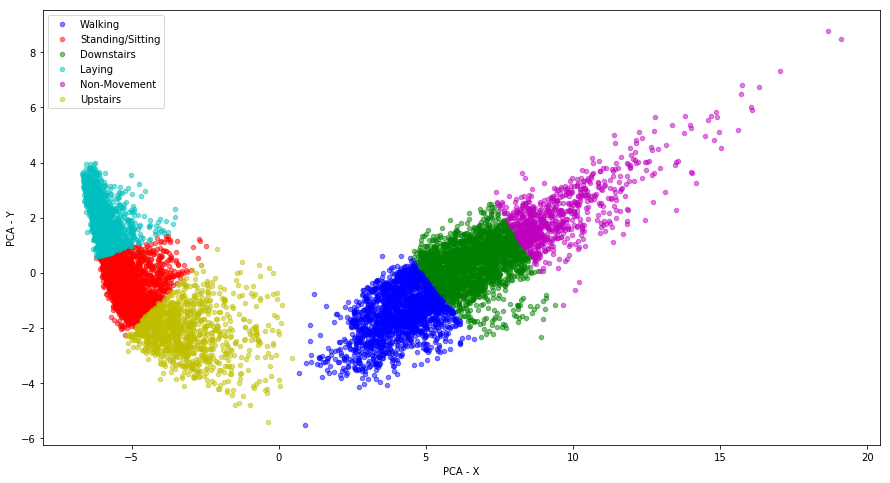

In [20]:
plt.figure(figsize=(15,8))
color = 'brgcmy'
for i in range(6):
#     temp = df_pca[km.labels_ == i]
# temp[:,0],temp[:,1]
    plt.scatter(df_pca.iloc[km.labels_ == i,0], df_pca.iloc[km.labels_ == i,1],label = i,c = color[i],alpha = 0.5,s=20)
#     df_pca[km.labels_ == i,0], df_pca[km.labels_ == i,1]
    
plt.legend(['Walking','Standing/Sitting','Downstairs','Laying','Non-Movement','Upstairs'])
plt.xlabel('PCA - X')
plt.ylabel('PCA - Y')
plt.show()

In [21]:
# 4 clusters
km = KMeans(n_clusters=4, random_state=42)
km = km.fit(df_pca)
df['pca'] = km.predict(df_pca)

In [22]:
(df[['Activity','pca']]
 .groupby(['Activity','pca'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           pca        
LAYING             0      1576
                   1        12
                   2       356
SITTING            0      1009
                   1         3
                   2       765
STANDING           0       738
                   1         1
                   2      1167
WALKING            1      1075
                   3       647
WALKING_DOWNSTAIRS 1       376
                   3      1030
WALKING_UPSTAIRS   1      1317
                   3       227

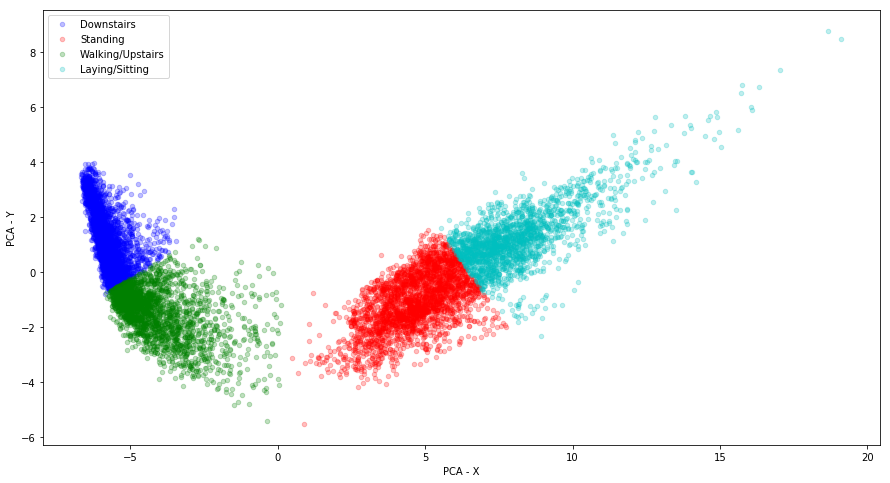

In [23]:
plt.figure(figsize=(15,8))
color = 'brgc'
for i in range(4):
#     temp = df_pca[km.labels_ == i]
# temp[:,0],temp[:,1]
    plt.scatter(df_pca.iloc[km.labels_ == i,0], df_pca.iloc[km.labels_ == i,1],label = i,c = color[i],alpha = 0.25,s=20)
#     df_pca[km.labels_ == i,0], df_pca[km.labels_ == i,1]
    
plt.legend(['Downstairs','Standing','Walking/Upstairs','Laying/Sitting'])
plt.xlabel('PCA - X')
plt.ylabel('PCA - Y')
plt.show()

In [24]:
# 2 clusters = walking and not walking
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(df_pca)
df['pca'] = km.predict(df_pca)

(df[['Activity','pca']]
 .groupby(['Activity','pca'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           pca        
LAYING             0        12
                   1      1932
SITTING            0         3
                   1      1774
STANDING           0         1
                   1      1905
WALKING            0      1722
WALKING_DOWNSTAIRS 0      1406
WALKING_UPSTAIRS   0      1544

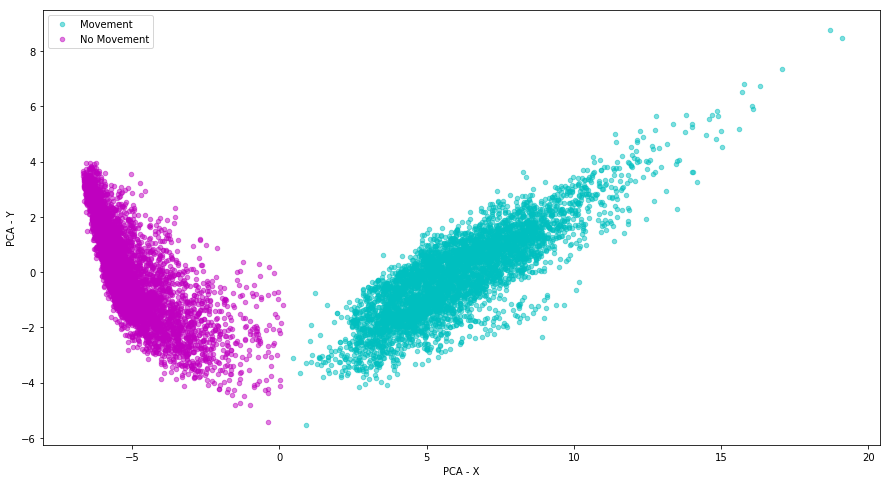

In [25]:
plt.figure(figsize=(15,8))
color = 'cm'
for i in range(2):
#     temp = df_pca[km.labels_ == i]
# temp[:,0],temp[:,1]
    plt.scatter(df_pca.iloc[km.labels_ == i,0], df_pca.iloc[km.labels_ == i,1],label = i,c = color[i],alpha = 0.5,s=20)
#     df_pca[km.labels_ == i,0], df_pca[km.labels_ == i,1]
    
plt.legend(['Movement','No Movement'])
plt.xlabel('PCA - X')
plt.ylabel('PCA - Y')
plt.show()

In [26]:
n_pca = 27
pca = PCA(n_components=n_pca)
df_pca = pca.fit(df[feature_columns])
df_pca = pd.DataFrame(pca.transform(df[feature_columns]), columns=['PCA%i' % i for i in range(n_pca)], index=df[feature_columns].index)

# 4 clusters
km = KMeans(n_clusters=6, random_state=42)
km = km.fit(df_pca)
df['pca27'] = km.predict(df_pca)

(df[['Activity','pca27']]
 .groupby(['Activity','pca27'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Activity           pca27        
LAYING             1         172
                   2          12
                   3        1760
SITTING            1         468
                   2           3
                   3          49
                   4        1257
STANDING           1         666
                   4        1240
WALKING            0         879
                   2         681
                   5         162
WALKING_DOWNSTAIRS 0         751
                   2         185
                   5         470
WALKING_UPSTAIRS   0         299
                   2        1162
                   5          83